<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/BA_Clasificacion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diplomatura en **Business Analytics** - FCEJ/UdA - **Algoritmos de Clasificación**
***Arbol de decisión / XGBoost / Bosque Aleatorio / Bayes ingenuo / AdaBoost / Análisis Discriminante Cuadrático***

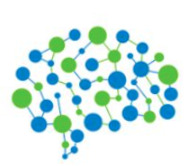

## Carga de librerías necesarias

In [ ]:
import pandas as pd #para la creación del dataframe y limpieza de los datos
import sklearn #para los algoritmos de aprendizaje automático
import sklearn.metrics as metrics #para la medición de los algoritmos
import matplotlib.pyplot as plt #librería gráfica básica
import pickle #para grabar y recuperar los modelos entrenados
import os

## Extracción de Datos - Creación del DataFrame

In [ ]:
datos_url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/Clientes.csv"

In [ ]:
clientes = pd.read_csv(datos_url) #los datos están separados por comas
clientes #vista del dataframe

,ID,Sexo,Edad,Salario,Compra
0,15624510,1,19,19000,No
1,15810944,1,35,20000,No
2,15668575,0,26,43000,No
3,15603246,0,27,57000,No
4,15804002,1,19,76000,No
...,...,...,...,...,...
395,15691863,0,46,41000,Si
396,15706071,1,51,23000,Si
397,15654296,0,50,20000,Si
398,15755018,1,36,33000,No


El dataframe contiene 5 variables y 400 observaciones.

Las variables indican:
- **ID:** La identificación del cliente
- **Sexo:** Corresponde 1 cuando es Masculino y 0 cuando es Femenino
- **Edad:** La edad del cliente
- **Salario:** El salario estimado del cliente
- **Compra:** Si, cuando el cliente ha comprado y no cuando no lo ha hecho.

El problema a resolver es con los datos historicos (entrenamiento) predecir en virtud de las variables independientes, si un cliente va a efectuar una compra

## Limpieza

In [ ]:
clientes.info() #visualizacion de los tipos de datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       400 non-null    int64 
 1   Sexo     400 non-null    int64 
 2   Edad     400 non-null    int64 
 3   Salario  400 non-null    int64 
 4   Compra   400 non-null    object
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
clientes = clientes.drop(columns=["ID"]) #se elimina la variable no relevante
clientes #vista del dataframe

,Sexo,Edad,Salario,Compra
0,1,19,19000,No
1,1,35,20000,No
2,0,26,43000,No
3,0,27,57000,No
4,1,19,76000,No
...,...,...,...,...
395,0,46,41000,Si
396,1,51,23000,Si
397,0,50,20000,Si
398,1,36,33000,No


Ahora el dataframe contiene 4 variables

## División del dataframe

Primero se divide el dataframe en variable objetivo $y$ con la columna que contiene los datos etiquetados por un lado, y en vector de entrada de los datos $X=$ con las variables restantes (variables independientes). 

In [ ]:
y = clientes["Compra"] #se define la variable objetivo
X = clientes.drop(columns=["Compra"]) #se elimina la variable objetivo del vector de entrada

In [ ]:
y #visualizando la variable objetivo

0      No
1      No
2      No
3      No
4      No
       ..
395    Si
396    Si
397    Si
398    No
399    Si
Name: Compra, Length: 400, dtype: object

In [ ]:
X #visualizando el vector de entrada

,Sexo,Edad,Salario
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


Ahora se divide la variable objetivo $y$ en un conjunto de datos de entrenamiento (train) y prueba (test). Lo mismo se realiza para el vector de entrada de los datos $X$.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

La proporcion es 75% para entrenamiento y 25% para prueba

In [ ]:
X_train.shape

(300, 3)

De las 400 observaciones del vector de entrada de datos, 300 observaciones son de entrenamiento

In [ ]:
X_test.shape

(100, 3)

De las 400 observaciones del vector de entrada de datos, 100 observaciones son de prueba

In [ ]:
y_train.shape

(300,)

De las 400 observaciones de la variable objetivo, 300 observaciones son de entrenamiento

In [ ]:
y_test.shape

(100,)

De las 400 observaciones de la variable objetivo, 100 observaciones son de prueba

# Evaluando los Algoritmos

## Algoritmo Árbol de Decisión

In [ ]:
from sklearn import tree

In [ ]:
ad = sklearn.tree.DecisionTreeClassifier(criterion = "entropy", random_state = 123, max_depth=2)

In [ ]:
ad.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [ ]:
y_pred_ad = ad.predict(X_test)

In [ ]:
mc = metrics.confusion_matrix(y_test, y_pred_ad)
print(mc)

[[64  4]
 [ 2 30]]


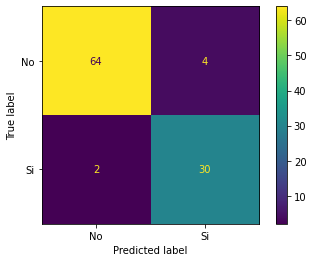

In [ ]:
metrics.plot_confusion_matrix(ad,X_test,y_test)

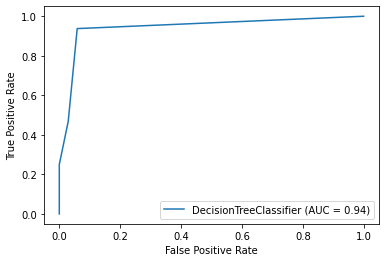

In [ ]:
metrics.plot_roc_curve(ad,X_test,y_test)

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_ad)
print(reporte)

              precision    recall  f1-score   support

          No       0.97      0.94      0.96        68
          Si       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



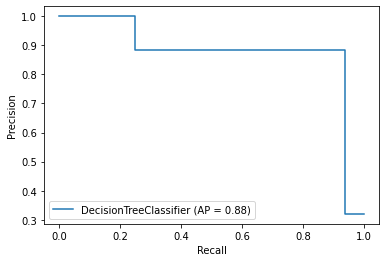

In [ ]:
metrics.plot_precision_recall_curve(ad,X_test,y_test)

### Guardando el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_arbol_decision.pkl"
file = open(path, "wb")
pickle.dump(ad, file)

### Leyendo el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_arbol_decision.pkl"
file = open(path, "rb")
modelo = pickle.load(file)

### Visualización Árbol de Decisión

In [ ]:
variables = ["Sexo","Edad","Salario"]
compra = ["No","Si"]

[Text(223.2, 362.4, 'Edad <= 44.5\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]\nclass = No'),
 Text(111.6, 217.44, 'Salario <= 90500.0\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]\nclass = No'),
 Text(55.8, 72.47999999999996, 'entropy = 0.241\nsamples = 176\nvalue = [169, 7]\nclass = No'),
 Text(167.39999999999998, 72.47999999999996, 'entropy = 0.619\nsamples = 39\nvalue = [6, 33]\nclass = Si'),
 Text(334.79999999999995, 217.44, 'Salario <= 41500.0\nentropy = 0.645\nsamples = 85\nvalue = [14, 71]\nclass = Si'),
 Text(279.0, 72.47999999999996, 'entropy = 0.211\nsamples = 30\nvalue = [1, 29]\nclass = Si'),
 Text(390.59999999999997, 72.47999999999996, 'entropy = 0.789\nsamples = 55\nvalue = [13, 42]\nclass = Si')]

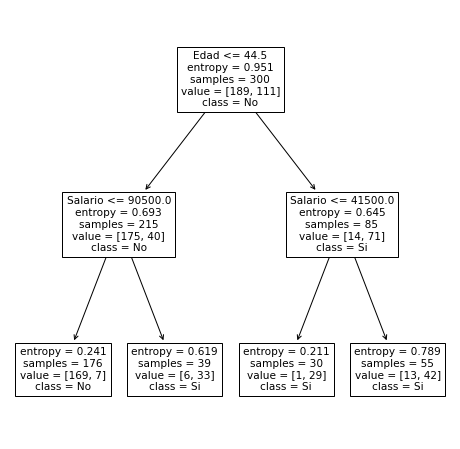

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
tree.plot_tree(ad, feature_names = variables, class_names= compra, ax=ax)

### Predicción

In [ ]:
prediccion_ad = ad.predict([[1,24,19000],[0,24,91000],[1,45,19000]])

In [ ]:
print(prediccion_ad)

['No' 'Si' 'Si']


In [ ]:
X_test

,Sexo,Edad,Salario
132,1,30,87000
309,0,38,50000
341,1,35,75000
196,0,30,79000
246,0,35,50000
...,...,...,...
146,0,27,96000
135,1,23,63000
390,1,48,33000
264,1,48,90000


In [ ]:
prediccion_ad_2 = ad.predict(X_test)

In [ ]:
print(prediccion_ad_2)

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No'
 'No' 'Si' 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'No'
 'No' 'No' 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'No' 'No'
 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'Si'
 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No'
 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'No'
 'Si' 'No' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'Si' 'No' 'Si'
 'Si' 'Si']


## XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
XGBoost = XGBClassifier()

In [ ]:
XGBoost.fit(X_train.values, y_train.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_XGBoost = XGBoost.predict(X_test.values)

In [ ]:
mc = metrics.confusion_matrix(y_test.values, y_pred_XGBoost)
print(mc)

[[64  4]
 [ 3 29]]


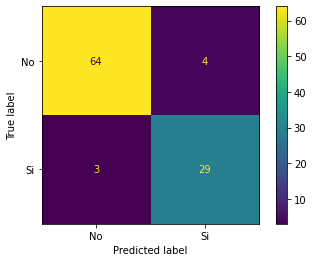

In [ ]:
metrics.plot_confusion_matrix(XGBoost,X_test.values,y_test.values)

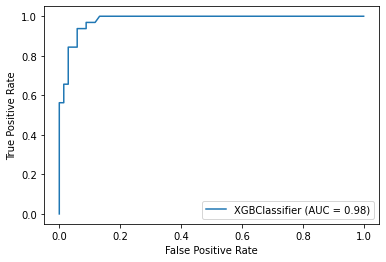

In [ ]:
metrics.plot_roc_curve(XGBoost,X_test.values,y_test.values)

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_XGBoost)
print(reporte)

              precision    recall  f1-score   support

          No       0.96      0.94      0.95        68
          Si       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



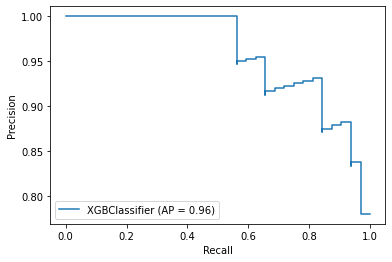

In [ ]:
metrics.plot_precision_recall_curve(XGBoost,X_test.values,y_test.values)

### Guardando el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_xgboost.pkl"
file = open(path, "wb")
pickle.dump(XGBoost, file)

### Leyendo el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_xgboost.pkl"
file = open(path, "rb")
modelo = pickle.load(file)

### Visualización XGBoost

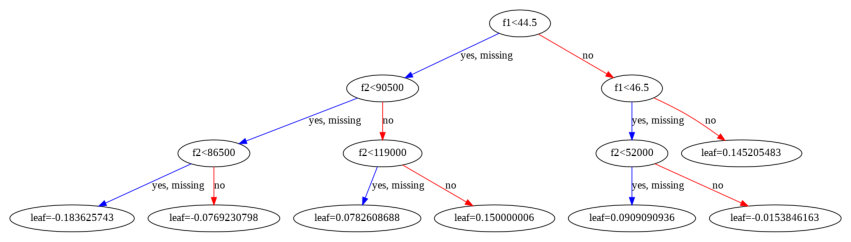

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
xgb.plot_tree(XGBoost, ax=ax)

### Predicción

In [ ]:
prediccion_XGBoost = XGBoost.predict([[1,24,19000],[0,24,91000],[1,45,19000]])

In [ ]:
print(prediccion_XGBoost)

['No' 'No' 'Si']


## Algoritmo Bosque Aleatorio

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 10, max_depth = 4, criterion = "entropy", random_state = 0)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rfc = rfc.predict(X_test)

In [ ]:
mc = metrics.confusion_matrix(y_test, y_pred_rfc)
print(mc)

[[64  4]
 [ 2 30]]


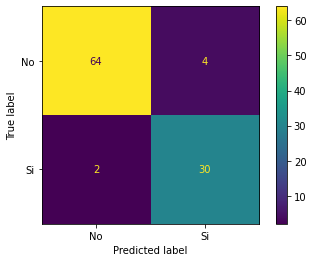

In [ ]:
metrics.plot_confusion_matrix(rfc,X_test,y_test)

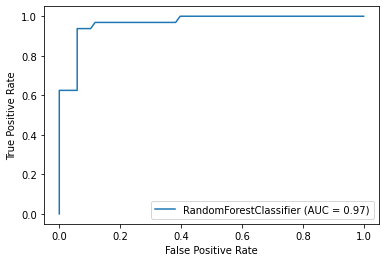

In [ ]:
metrics.plot_roc_curve(rfc,X_test,y_test)

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_rfc)
print(reporte)

              precision    recall  f1-score   support

          No       0.97      0.94      0.96        68
          Si       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



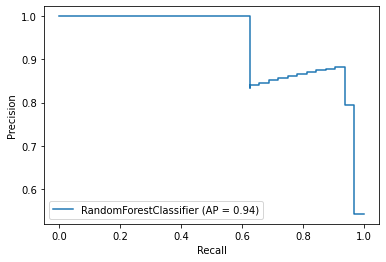

In [ ]:
metrics.plot_precision_recall_curve(rfc,X_test,y_test)

### Guardando el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_rfc.pkl"
file = open(path, "wb")
pickle.dump(rfc, file)

### Leyendo el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_rfc.pkl"
file = open(path, "rb")
modelo = pickle.load(file)

### Predicción

In [ ]:
prediccion_rfc = rfc.predict([[1,24,19000],[0,24,91000],[1,45,19000]])

In [ ]:
print(prediccion_rfc)

['No' 'No' 'Si']


## Algoritmo Bayes ingenuo

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
bayes = GaussianNB()

In [ ]:
bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_bayes = bayes.predict(X_test)

In [ ]:
mc = metrics.confusion_matrix(y_test, y_pred_bayes)
print(mc)

[[65  3]
 [ 7 25]]


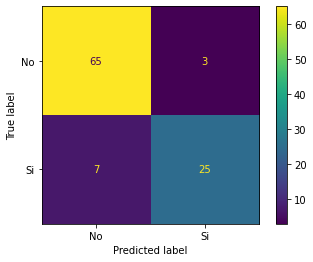

In [ ]:
metrics.plot_confusion_matrix(bayes,X_test,y_test)

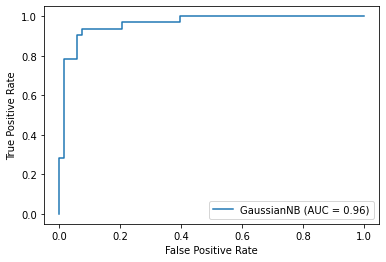

In [ ]:
metrics.plot_roc_curve(bayes,X_test,y_test)

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_bayes)
print(reporte)

              precision    recall  f1-score   support

          No       0.90      0.96      0.93        68
          Si       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



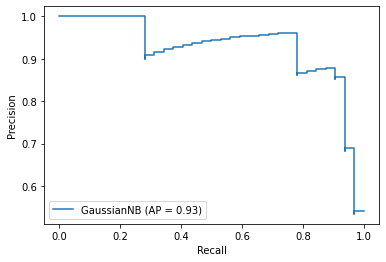

In [ ]:
metrics.plot_precision_recall_curve(bayes,X_test,y_test)

### Guardando el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_bayes.pkl"
file = open(path, "wb")
pickle.dump(bayes, file)

### Leyendo el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_bayes.pkl"
file = open(path, "rb")
modelo = pickle.load(file)

### Predicción

In [ ]:
prediccion_bayes = bayes.predict([[1,24,19000],[0,24,91000],[1,45,19000]])

In [ ]:
print(prediccion_bayes)

['No' 'No' 'Si']


## Algoritmo Análisis Discriminante Cuadrático

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
qda = QuadraticDiscriminantAnalysis()

In [ ]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
y_pred_qda = qda.predict(X_test)

In [ ]:
mc = metrics.confusion_matrix(y_test, y_pred_qda)
print(mc)

[[64  4]
 [ 4 28]]


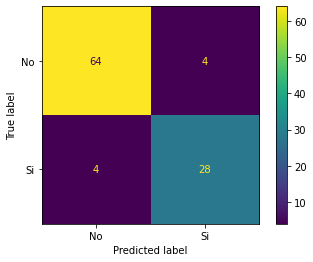

In [ ]:
metrics.plot_confusion_matrix(qda,X_test,y_test)

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_qda)
print(reporte)

              precision    recall  f1-score   support

          No       0.94      0.94      0.94        68
          Si       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



### Guardando el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_qda.pkl"
file = open(path, "wb")
pickle.dump(qda, file)

### Leyendo el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_qda.pkl"
file = open(path, "rb")
modelo = pickle.load(file)

### Prediccion

In [ ]:
prediccion_qda = qda.predict([[1,24,19000],[0,24,91000],[1,45,19000]])

In [ ]:
print(prediccion_qda)

['No' 'No' 'Si']
